# Analysis Of Stock Price And Sales Prediction(Data Science Project)

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset(Get it from kaagle)

In [ ]:
df1 = pd.read_csv('/content/Advertising.csv')


In [ ]:
df=df1.drop("Unnamed: 0",axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Data Analysis

In [ ]:
#data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#description of statistical data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#total null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Data Visualisation

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


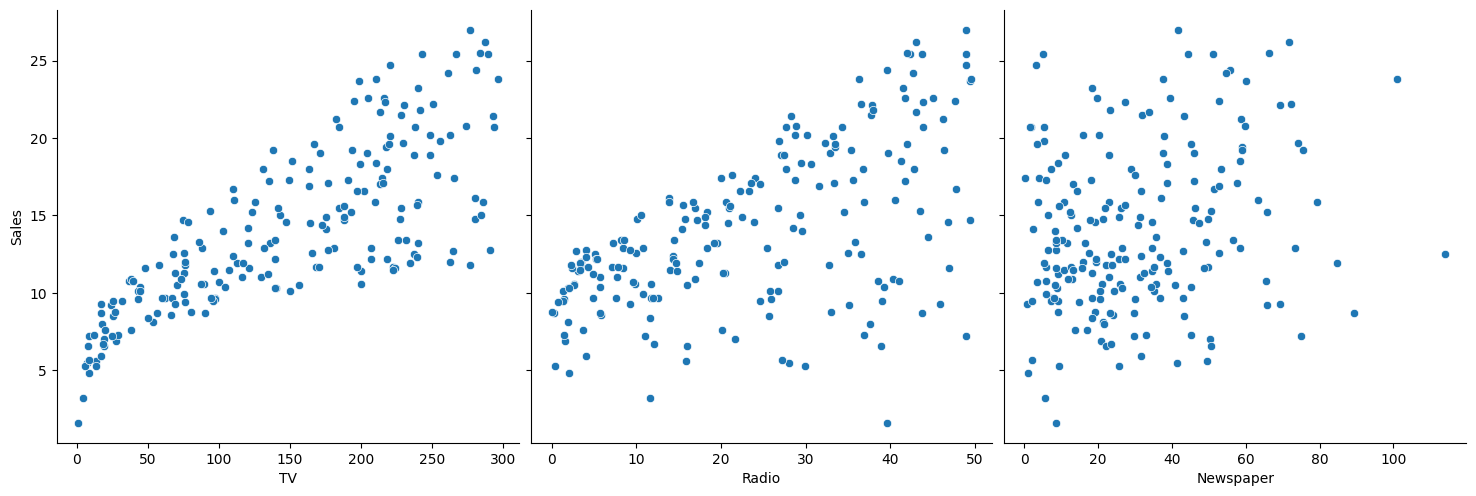

In [ ]:
#pair wise relationship
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=5,aspect=1,kind='scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

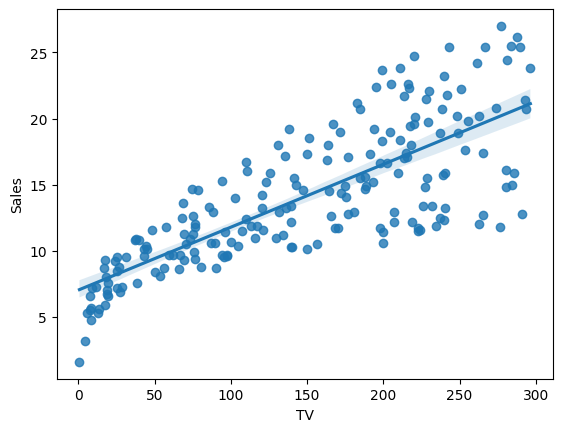

In [ ]:
sns.regplot(x='TV',y='Sales',data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

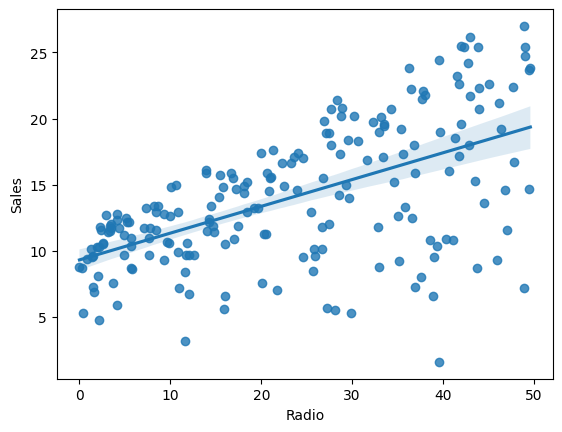

In [ ]:
sns.regplot(x='Radio',y='Sales',data=df)

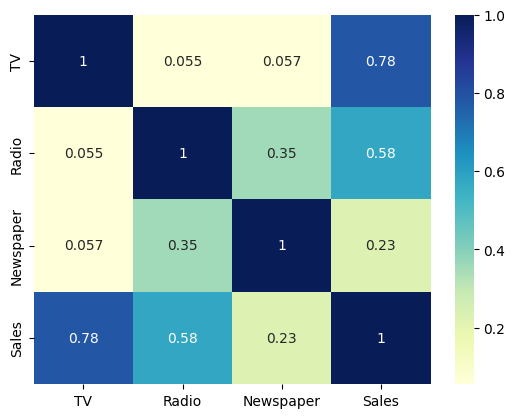

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
X=df['TV']
y=df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [ ]:
X_train.shape

(140,)

In [ ]:
X_test.shape

(60,)

In [ ]:
y_train.head()

,Sales
74,17.0
3,18.5
185,22.6
26,15.0
90,11.2


In [ ]:
y_train.shape

(140,)

In [ ]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())

const    6.989666
TV       0.046497
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.84e-30
Time:                        14:54:29   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

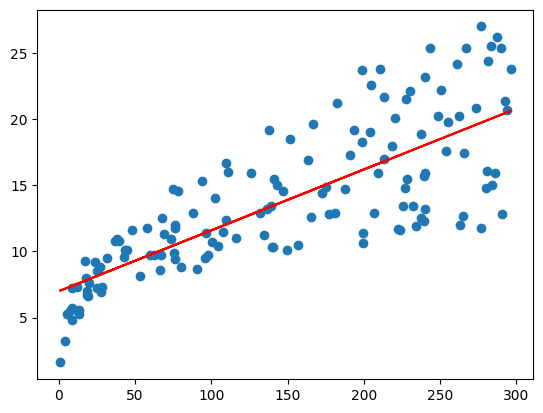

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.989+0.046*X_train,'r')
plt.show()

In [ ]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)
print(y_train,y_train_pred)

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     16.912202
3      14.034016
185    16.521624
26     13.634138
90     13.234261
         ...    
87     12.136923
103    15.726520
67     13.466748
24      9.886451
8       7.389543
Length: 140, dtype: float64


<ipython-input-25-0dd637eca0a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


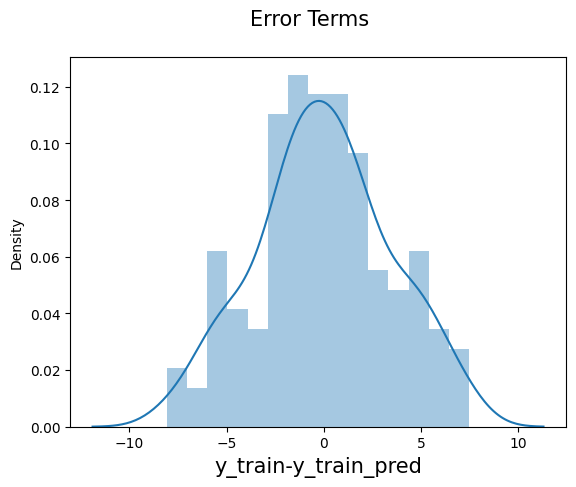

In [ ]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

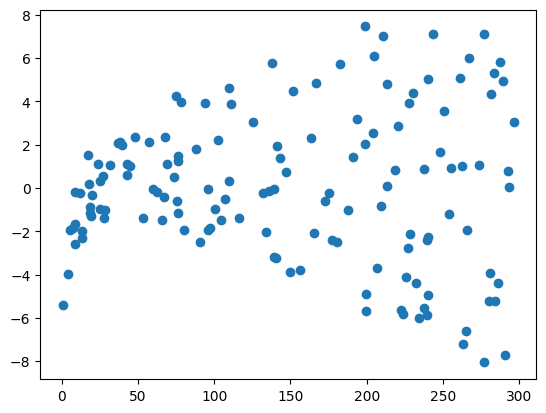

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr.predict(X_test_sm)
y_test_pred.head()

,0
126,7.352345
104,18.065337
99,13.276109
92,17.112141
111,18.228077


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('mean squared error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('r score:',r2_score(y_test,y_test_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_test_pred))

mean squared error 2.8241456288327003
r score: 0.5942987267783303
mean absolute error: 2.1619849326720715


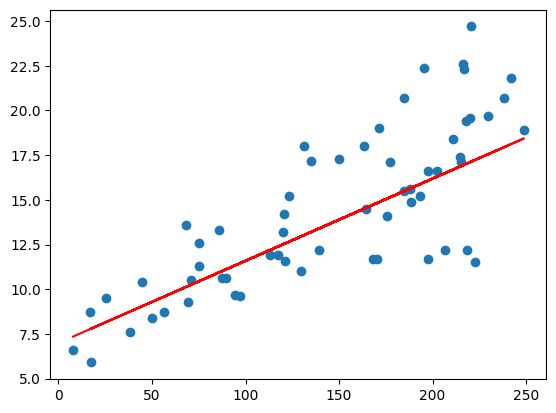

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.989+0.046*X_test,'r')
plt.show()

In [ ]:
X=df['Radio']
y=df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())

const    9.247973
Radio    0.201073
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     60.51
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.54e-12
Time:                        14:54:54   Log-Likelihood:                -411.70
No. Observations:                 140   AIC:                             827.4
Df Residuals:                     138   BIC:                             833.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

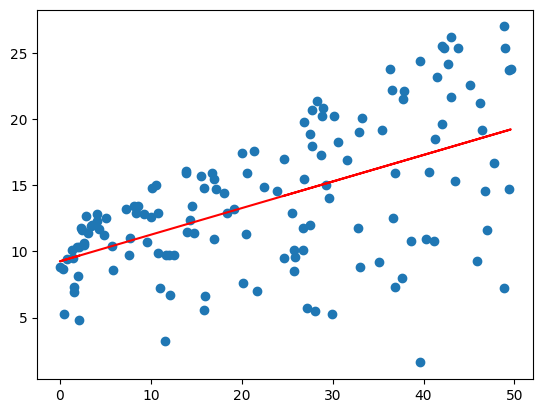

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,9.248+0.201*X_train,'r')
plt.show()

In [ ]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)
print(y_train,y_train_pred)

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     14.194367
3      17.552285
185    18.316362
26     15.139410
90     10.233230
         ...    
87     17.411534
103    12.706427
67     12.163531
24     11.781492
8       9.670226
Length: 140, dtype: float64


<ipython-input-33-0dd637eca0a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


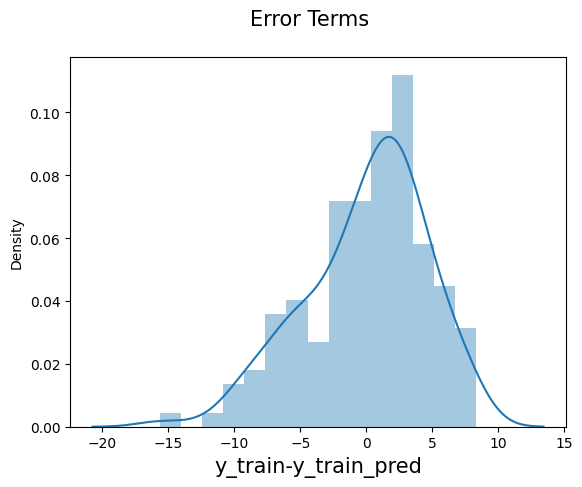

In [ ]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

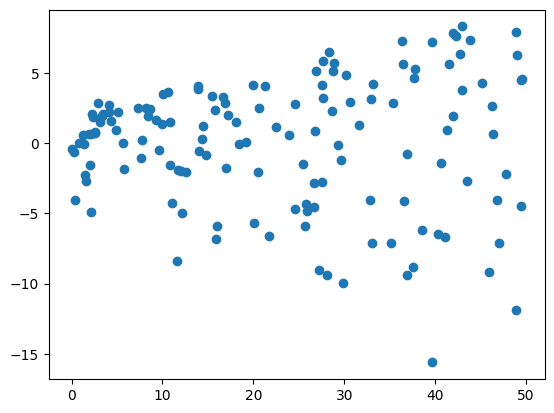

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr.predict(X_test_sm)
y_test_pred.head()

,0
126,17.069710
104,16.144774
99,17.632714
92,15.983916
111,16.888744


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('mean squared error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('r score:',r2_score(y_test,y_test_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_test_pred))

mean squared error 3.3747017041729372
r score: 0.4207007355904727
mean absolute error: 2.6019889092180724


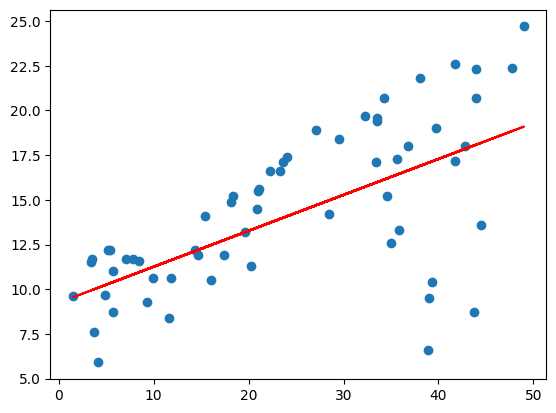

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,9.248+0.201*X_test,'r')
plt.show()

In [ ]:
X=df['Newspaper']
y=df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())

const        11.484399
Newspaper     0.075492
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000195
Time:                        14:55:20   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

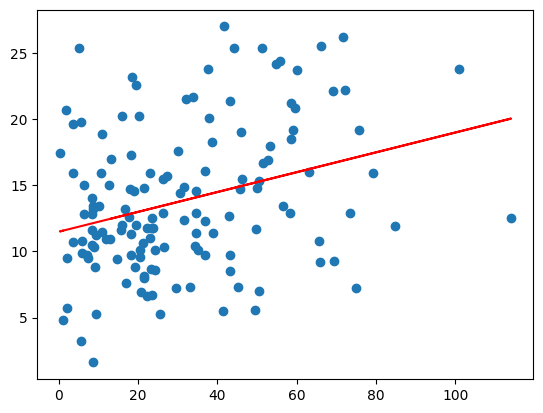

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,11.484+0.075*X_train,'r')
plt.show()

In [ ]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)
print(y_train,y_train_pred)

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     12.473340
3      15.900662
185    12.964036
26     12.435594
90     12.186472
         ...    
87     16.255472
103    12.835700
67     12.254414
24     12.865897
8      11.559891
Length: 140, dtype: float64


<ipython-input-41-0dd637eca0a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


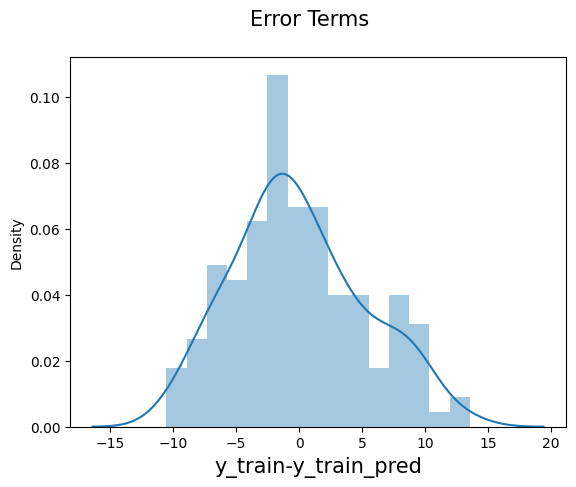

In [ ]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

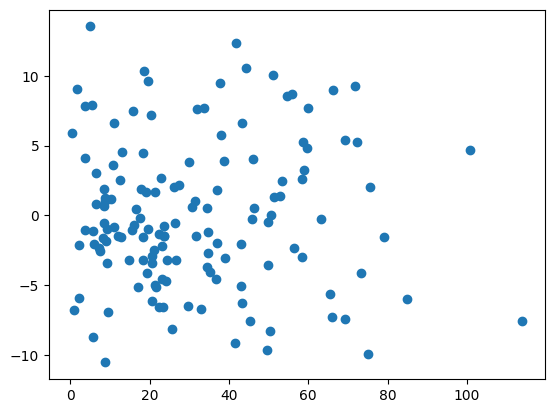

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr.predict(X_test_sm)
y_test_pred.head()

,0
126,15.304277
104,11.884505
99,14.949467
92,15.938407
111,13.235806


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('mean squared error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('r score:',r2_score(y_test,y_test_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_test_pred))

mean squared error 4.773167681558676
r score: -0.15889897366292227
mean absolute error: 3.8883161356570413


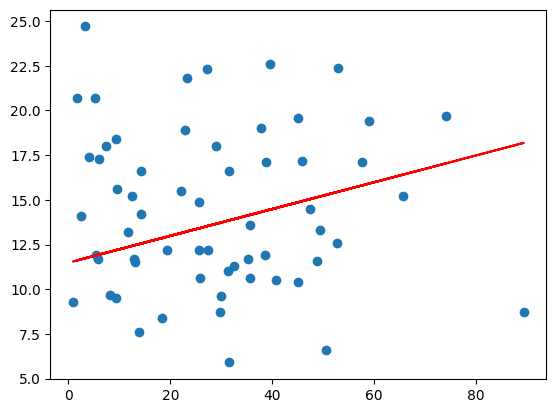

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,11.484+0.075*X_test,'r')
plt.show()